<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/3_Southern_Africa_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries 
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [18]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=';')
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980.0,NaN,3933.805000,17.10,0.0,0.000000,0.0000,14186.000,NaN,NaN,17.100000,0.0000,277.301917,1.205414,0.000000,278.507331,NaN,NaN,Central and East Asia
1,Afghanistan,1981.0,NaN,3763.130000,96.50,0.0,0.000000,0.0000,13.984,NaN,NaN,96.500000,0.0000,269.102546,6.900744,0.000000,276.003289,NaN,NaN,Central and East Asia
2,Afghanistan,1982.0,NaN,3602.788000,74.90,0.0,0.000000,0.0000,13673.000,NaN,NaN,74.900000,0.0000,263.496526,5.477949,0.000000,268.974475,NaN,NaN,Central and East Asia
3,Afghanistan,1983.0,NaN,3474.450000,79503.00,0.0,0.000000,0.0000,13.300,NaN,NaN,79503.000000,0.0000,261.236842,5.977669,0.000000,267.214511,NaN,NaN,Central and East Asia
4,Afghanistan,1984.0,NaN,3306.778000,21.15,0.0,0.000000,0.0000,12932.000,NaN,NaN,21.150000,0.0000,255.705073,1.635478,0.000000,257.340551,NaN,NaN,Central and East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,Zimbabwe,2009.0,141.317483,1677.731196,576.30,0.0,2.163975,0.0144,12474.000,69.115038,217.997711,578.463975,0.0144,134.498252,46.373575,0.001154,180.870673,287.112748,23.016895,Southern Africa
1829,Zimbabwe,2010.0,136.990970,1723.572567,368.60,0.0,2.163975,0.0144,12571.000,34.650952,63.648974,370.763975,0.0144,137.107037,29.493594,0.001145,166.599486,98.299925,7.819579,Southern Africa
1830,Zimbabwe,2011.0,139.933312,1765.470308,640.00,0.0,2.163975,0.0144,12.754,24.445836,32.984747,642.163975,0.0144,138.424832,50.350006,0.001129,188.773709,57.430583,4.502947,Southern Africa
1831,Zimbabwe,2012.0,142.318797,1255.897663,620.00,0.0,2.163975,0.0144,13.014,16.082141,26.456731,622.163975,0.0144,96.503586,47.807283,0.001107,144.309762,42.538873,3.268701,Southern Africa


In [3]:
#creating a function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
0.08163898693259493
146.94672633007977
0.25542282238664893
Zambia
0.16033917081936308
137.07494644990678
0.10204836994413177
Swaziland
0.03470185969108791
161.44528018150035
0.018553081340854743
Namibia
-0.009676152510288845
164.2146432896008
0.0003263472472401443
Mozambique
0.43221407527965217
108.64721957299331
0.3655845253308614
Malawi
0.1840789292301416
142.00037520568353
0.6345102721940177
Madagascar
0.18496954635035562
143.50370929295602
0.27880976905290983
Lesotho
0.42999363788626466
142.25507330036444
0.45678953928696375


,Production Quantity per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year),1.000000,0.675862
Food Availibility per capita (kg/cap/year),0.675862,1.000000


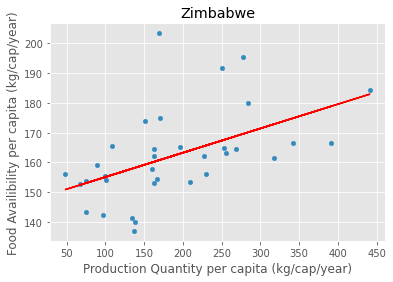

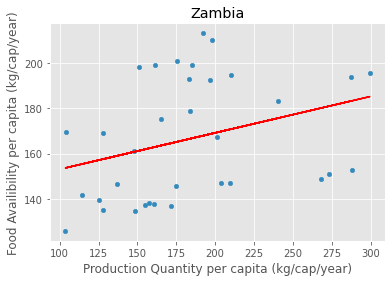

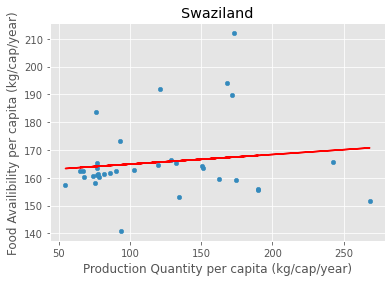

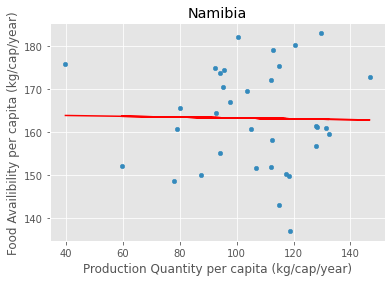

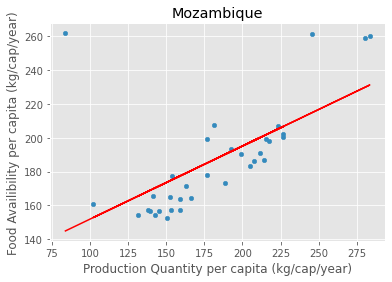

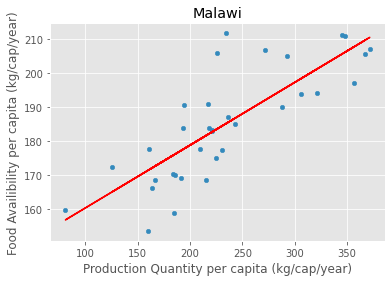

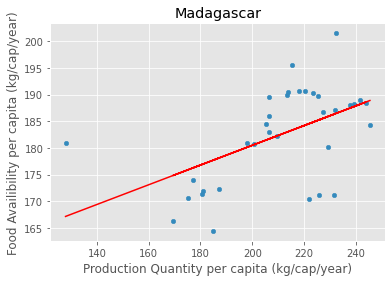

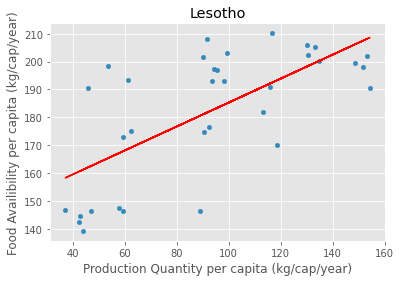

In [4]:
#calling the function for every country in Southern Africa, choosing food production and food availibility as the arguments
plot_country('Zimbabwe','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [17]:
#calculating the corelation coefficient between production per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                    0.505394
Food Availibility per capita (kg/cap/year)                                        0.505394                                    1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                       1.00000                                     0.31945
Food Availibility per capita (kg/cap/year)                                         0.31945                                     1.00000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capit

In [14]:
def plot_country2(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)

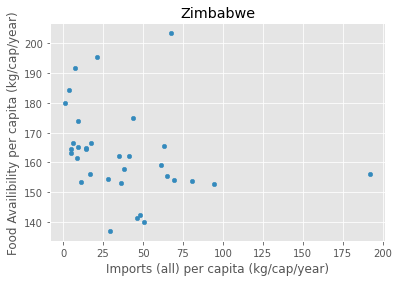

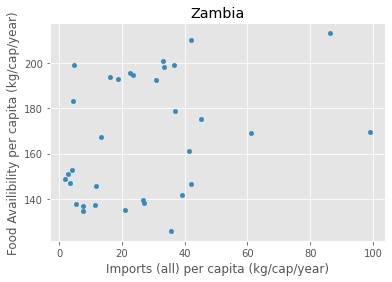

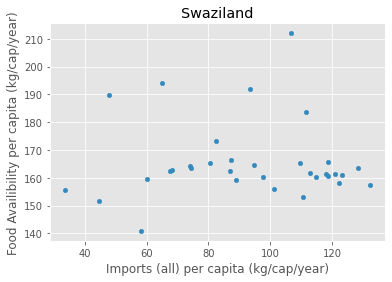

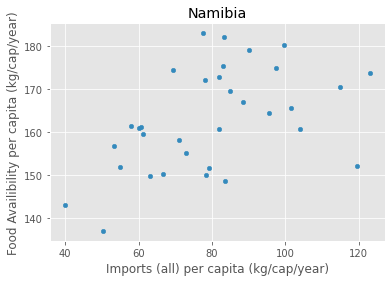

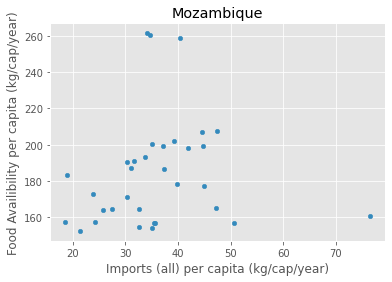

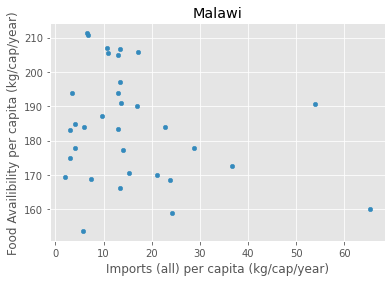

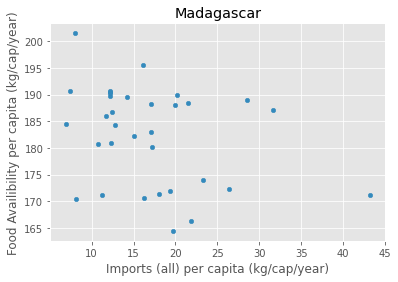

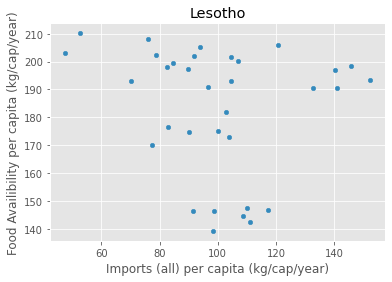

In [16]:
#calling the function for every country in Southern Africa, choosing food imports and food availibility as the arguments
plot_country2('Zimbabwe','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Zambia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Swaziland','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Namibia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Mozambique','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Malawi','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Madagascar','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Lesotho','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

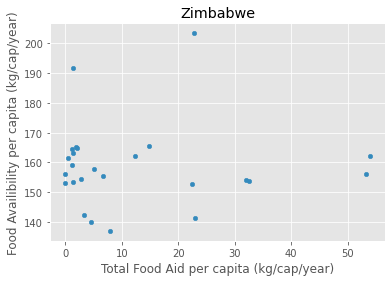

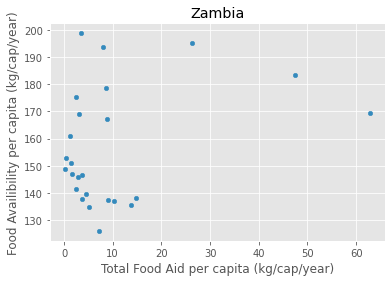

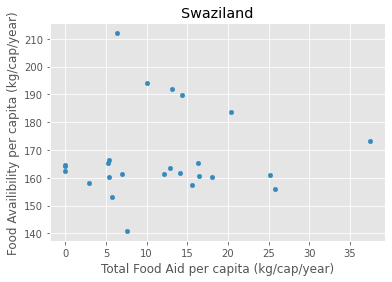

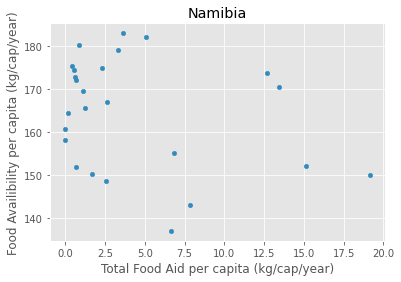

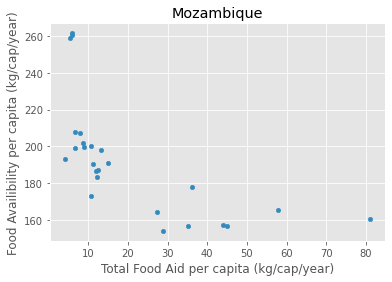

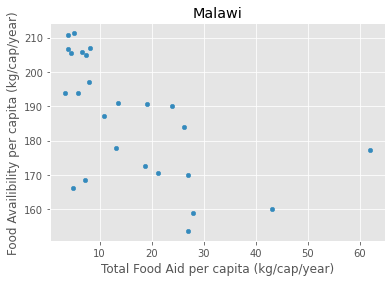

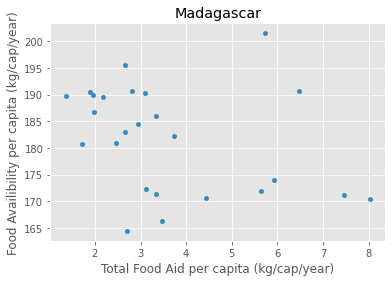

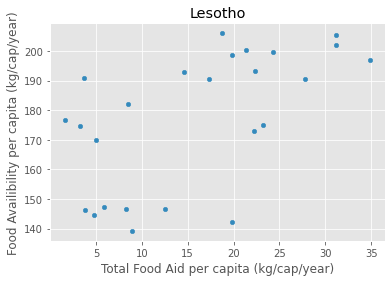

In [19]:
#calling the function for every country in Southern Africa, choosing food aid and food availibility as the arguments
plot_country2('Zimbabwe','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Zambia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Swaziland','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Namibia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Mozambique','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Malawi','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Madagascar','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country2('Lesotho','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')